# 11. Анализ поведения клиентов оператора связи

Сделать предварительный анализ тарифов на небольшой выборке клиентов и сделать вывод — какой тариф лучше.


# Чтение данных

          Импортируем библиотеку pandas. Считаем данные из calls.csv в датафрейм и сохраним в переменную calls

Таблица calls — информация о звонках:

id — уникальный номер звонка

call_date — дата звонка

duration — длительность звонка в минутах

user_id — идентификатор пользователя, сделавшего звонок

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn 
import seaborn as sns
import numpy as np
plt.style.use("ggplot")

calls = pd.read_csv('calls.csv')
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


                Считаем данные из internet.csv в датафрейм и сохраним в переменную internet

Таблица internet — информация об интернет-сессиях:

id — уникальный номер сессии

mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)

session_date — дата интернет-сессии

user_id — идентификатор пользователя

In [2]:
internet = pd.read_csv('internet.csv')
internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


                   Считаем данные из messages.csv в датафрейм и сохраним в переменную messages

Таблица messages — информация о сообщениях:

id — уникальный номер звонка

message_date — дата сообщения

user_id — идентификатор пользователя, отправившего сообщение

In [3]:
messages = pd.read_csv('messages.csv')
messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


                     Считаем данные из tariffs.csv в датафрейм и сохраним в переменную tariffs

Таблица tariffs — информация о тарифах:
    
tariff_name — название тарифа

rub_monthly_fee — ежемесячная абонентская плата в рублях

minutes_included — количество минут разговора в месяц, включённых в абонентскую плату

messages_included — количество сообщений в месяц, включённых в абонентскую плату

mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)

rub_per_minute — стоимость минуты разговора сверх тарифного пакета 
(например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)

rub_per_message — стоимость отправки сообщения сверх тарифного пакета

rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [4]:
tariffs = pd.read_csv('tariffs.csv')
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


              Считаем данные из users.csv в датафрейм и сохраним в переменную users

                                       Описание данных

Таблица users — информация о пользователях:

user_id — уникальный идентификатор пользователя

first_name — имя пользователя

last_name — фамилия пользователя

age — возраст пользователя (годы)

reg_date — дата подключения тарифа (день, месяц, год)

churn_date — дата прекращения пользования тарифом (если значение пропущено, значит, тариф ещё действовал на момент выгрузки данных)

city — город проживания пользователя

tarif — название тарифного плана

In [5]:
users = pd.read_csv('users.csv')
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


# Предобработка данных

Преобразую дату в столбцах

In [6]:
users[['reg_date', 'churn_date']] = users[['reg_date', 'churn_date']].apply(pd.to_datetime)
calls['call_date'] = pd.to_datetime(calls['call_date'])
messages['message_date'] = pd.to_datetime(messages['message_date'])
internet['session_date'] = pd.to_datetime(internet['session_date'])

                             Выведем основную информацию о датафрейме calls

In [7]:
display(calls.head(), calls.tail())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,id,call_date,duration,user_id
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499
202606,1499_219,2018-12-14,19.62,1499


In [8]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


Количество явных дубликатов

In [9]:
calls.duplicated().sum()

0

Построим общую гистограмму для всех столбцов

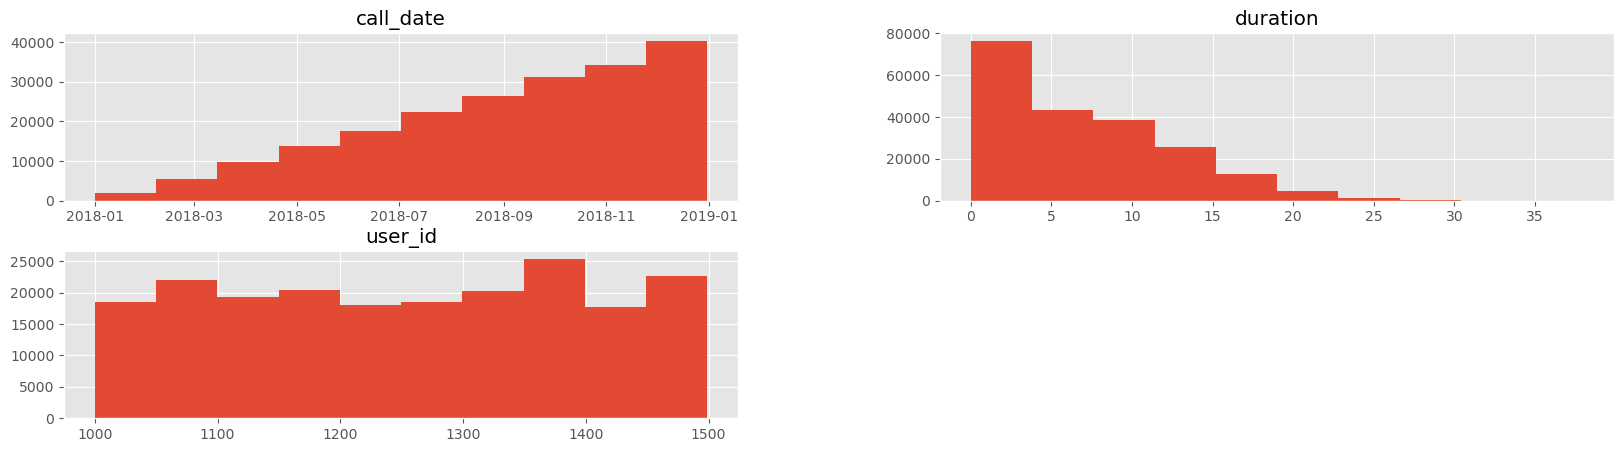

In [10]:
calls.hist(figsize=(20, 5))
plt.show()

Изучим пропущенные значения в столбцах

In [11]:
calls.isna().mean().sort_values(ascending=False)

id           0.0
call_date    0.0
duration     0.0
user_id      0.0
dtype: float64

В столбце duration датафрейма calls значения дробные - округлим и приведем к типу int.

In [12]:
calls['duration'] = np.ceil(calls['duration']).astype('int')

In [13]:
calls['duration']

0          0
1          0
2          3
3         14
4          6
          ..
202602     1
202603    19
202604    11
202605     5
202606    20
Name: duration, Length: 202607, dtype: int32

Создадим столбец month с номером месяца

In [14]:
calls['month'] = calls['call_date'].dt.month

Дубликатов не выявлено, пропущенных значений нет, типы данных верные

                         Выведем основную информацию о датафрейме internet

In [15]:
display(internet.head(), internet.tail())

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


,Unnamed: 0,id,mb_used,session_date,user_id
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499
149395,149395,1499_156,544.37,2018-10-26,1499


Удалим дублирующий столбец

In [16]:
internet = internet[['id','mb_used','session_date','user_id']]

In [17]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


Количество явных дубликатов

In [18]:
internet.duplicated().sum()

0

Изучим пропущенные значения в столбцах

In [19]:
internet.isna().mean().sort_values(ascending=False)

id              0.0
mb_used         0.0
session_date    0.0
user_id         0.0
dtype: float64

Построим общую гистограмму для всех столбцов

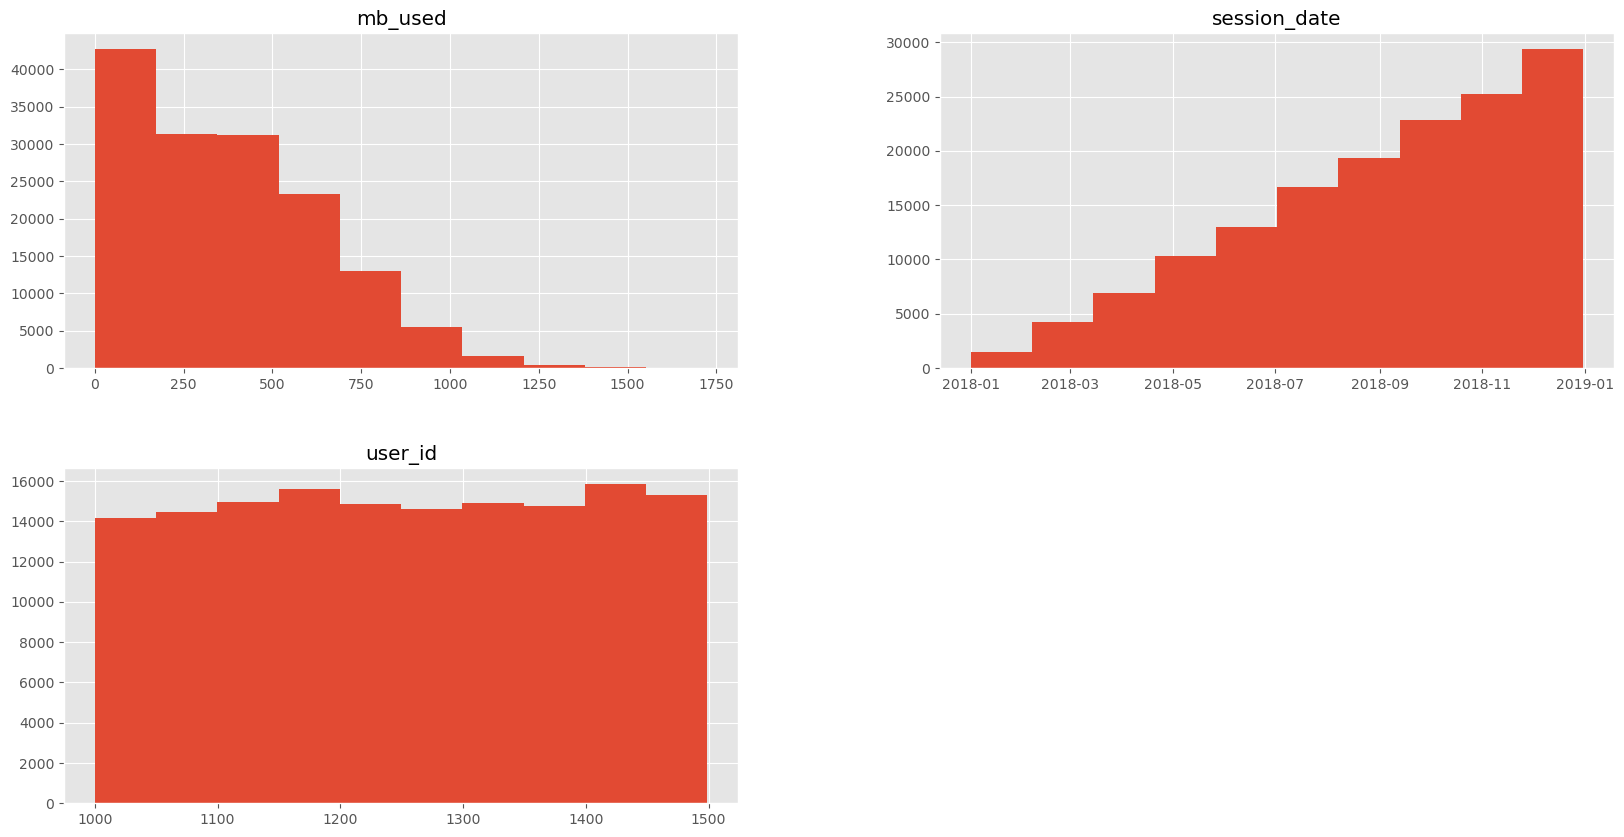

In [20]:
internet.hist(figsize=(20, 10))
plt.show()

Создадим столбец month с номером месяца

In [21]:
internet['month'] = internet['session_date'].dt.month

                         Выведем основную информацию о датафрейме messages

In [22]:
display(messages.head(), messages.tail())

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,id,message_date,user_id
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499
123035,1499_183,2018-11-16,1499


In [23]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


Количество явных дубликатов

In [24]:
messages.duplicated().sum()

0

Изучим пропущенные значения в столбцах

In [25]:
messages.isna().mean().sort_values(ascending=False)

id              0.0
message_date    0.0
user_id         0.0
dtype: float64

Построим общую гистограмму для всех столбцов

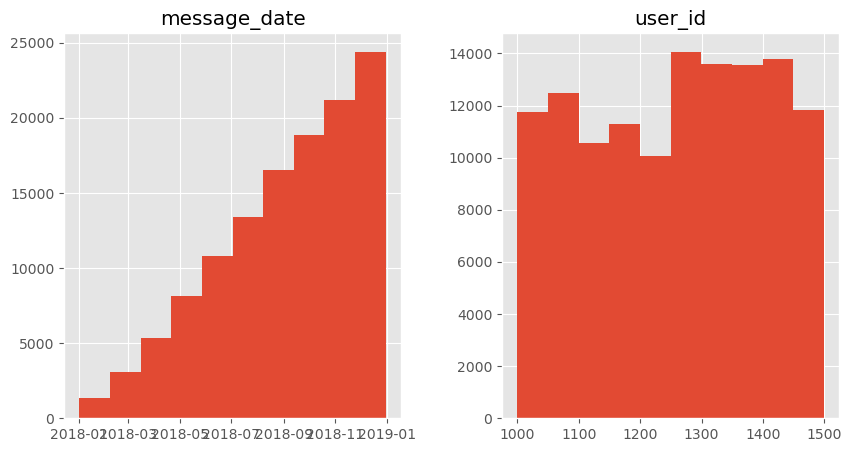

In [26]:
messages.hist(figsize=(10, 5))
plt.show()

Создадим столбец month с номером месяца

In [27]:
messages['month'] = messages['message_date'].dt.month

                         Выведем основную информацию о датафрейме users

In [28]:
display(users.head(), users.tail())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
495,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
499,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart


In [29]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Количество явных дубликатов

In [30]:
users.duplicated().sum()

0

Изучим пропущенные значения в столбцах

In [31]:
users.isna().mean().sort_values(ascending=False)

churn_date    0.924
user_id       0.000
age           0.000
city          0.000
first_name    0.000
last_name     0.000
reg_date      0.000
tariff        0.000
dtype: float64

churn_date - 0.924 , почти 95% пропусков

Построим общую гистограмму для всех столбцов

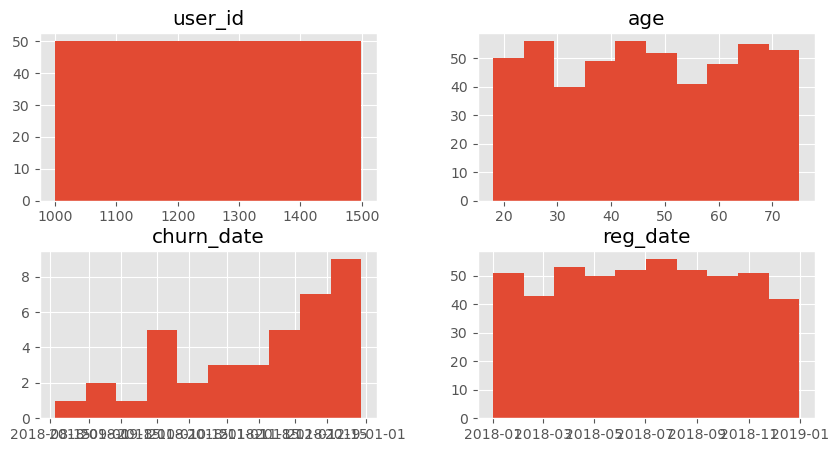

In [32]:
users.hist(figsize=(10, 5))
plt.show()

In [33]:
internet

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9
...,...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499,10
149392,1499_153,490.13,2018-12-14,1499,12
149393,1499_154,0.00,2018-10-27,1499,10
149394,1499_155,1246.32,2018-11-26,1499,11


In [34]:
calls

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,1,1499,12
202603,1499_216,2018-10-18,19,1499,10
202604,1499_217,2018-11-10,11,1499,11
202605,1499_218,2018-10-06,5,1499,10


Создадим переменную для подсчета количества сделанных звонков разговора для каждого пользователя по месяцам 

In [35]:
calls_per_month = calls.groupby(['user_id','month']).agg(calls=('duration', 'count'))
calls_per_month

calls
user_id month       
1000    5         22
        6         43
        7         47
        8         52
        9         58
...              ...
1498    10        41
1499    9          9
        10        68
        11        74
        12        69

[3174 rows x 1 columns]

Посчитаем количество израсходованных минут разговора для каждого пользователя по месяцам

In [36]:
minutes_per_month = calls.groupby(['user_id','month']).agg(minutes=('duration', 'sum'))
minutes_per_month

minutes
user_id month         
1000    5          159
        6          172
        7          340
        8          408
        9          466
...                ...
1498    10         247
1499    9           70
        10         449
        11         612
        12         492

[3174 rows x 1 columns]

Посчитаем количество отправленных сообщений по месяцам для каждого пользователя и сохраним в переменную

In [37]:
messages_per_month = messages.groupby(['user_id','month']).agg(messages=('message_date', 'count'))
messages_per_month

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
...                 ...
1498    10           42
1499    9            11
        10           48
        11           59
        12           66

[2717 rows x 1 columns]

Посчитаем количество потраченных мегабайт по месяцам для каждого пользователя 

In [38]:
sessions_per_month = internet.groupby(['user_id','month']).agg({'mb_used': 'sum'})
sessions_per_month

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
...                 ...
1498    10     20579.36
1499    9       1845.75
        10     17788.51
        11     17963.31
        12     13055.58

[3203 rows x 1 columns]

                                  Исследовательский анализ данных

Объединяем все посчитанные выше значения в один датафрейм user_behavior. Для каждой пары «пользователь — месяц» будут доступны информация о тарифе, количестве звонков, сообщений и потраченных мегабайтах.

In [39]:
users['churn_date'].count() / users['churn_date'].shape[0] * 100

7.6

Расторгли договор 7.6% клиентов из датасета

In [40]:
user_behavior = calls_per_month\
    .merge(messages_per_month, left_index=True, right_index=True, how='outer')\
    .merge(sessions_per_month, left_index=True, right_index=True, how='outer')\
    .merge(minutes_per_month, left_index=True, right_index=True, how='outer')\
    .reset_index()\
    .merge(users, how='left', left_on='user_id', right_on='user_id')\

user_behavior.head()

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,22.0,2253.49,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43.0,60.0,23233.77,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47.0,75.0,14003.64,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52.0,81.0,14055.93,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58.0,57.0,14568.91,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


Проверим пропуски в таблице user_behavior после объединения

In [41]:
user_behavior.isna().mean().sort_values(ascending=False)

churn_date    0.941817
messages      0.154636
calls         0.012446
minutes       0.012446
mb_used       0.003423
user_id       0.000000
month         0.000000
age           0.000000
city          0.000000
first_name    0.000000
last_name     0.000000
reg_date      0.000000
tariff        0.000000
dtype: float64

Заполним образовавшиеся пропуски в данных

In [42]:
user_behavior['calls'] = user_behavior['calls'].fillna(0)
user_behavior['minutes'] = user_behavior['minutes'].fillna(0)
user_behavior['messages'] = user_behavior['messages'].fillna(0)
user_behavior['mb_used'] = user_behavior['mb_used'].fillna(0)

Присоединяем информацию о тарифах

In [43]:
tariffs = tariffs.rename(
    columns={
        'tariff_name': 'tariff'
    }
)

In [44]:
user_behavior = user_behavior.merge(tariffs, on='tariff')

Считаем количество минут разговора, сообщений и мегабайт, превышающих включённые в тариф

In [45]:
user_behavior['paid_minutes'] = user_behavior['minutes'] - user_behavior['minutes_included']
user_behavior['paid_messages'] = user_behavior['messages'] - user_behavior['messages_included']
user_behavior['paid_mb'] = user_behavior['mb_used'] - user_behavior['mb_per_month_included']

for col in ['paid_messages', 'paid_minutes', 'paid_mb']:
    user_behavior.loc[user_behavior[col] < 0, col] = 0

Переводим превышающие тариф мегабайты в гигабайты и сохраняем в столбец paid_gb

In [46]:
user_behavior['paid_gb'] = np.ceil(user_behavior['paid_mb'] / 1024).astype(int)

Считаем выручку за минуты разговора, сообщения и интернет

In [47]:
user_behavior['cost_minutes'] = user_behavior['paid_minutes'] * user_behavior['rub_per_minute']
user_behavior['cost_messages'] = user_behavior['paid_messages'] * user_behavior['rub_per_message']
user_behavior['cost_gb'] = user_behavior['paid_gb'] * user_behavior['rub_per_gb']

Считаем помесячную выручку с каждого пользователя, она будет храниться в столбце total_cost

In [48]:
user_behavior['total_cost'] = \
      user_behavior['rub_monthly_fee']\
    + user_behavior['cost_minutes']\
    + user_behavior['cost_messages']\
    + user_behavior['cost_gb']

Датафрейм stats_df для каждой пары «месяц — тариф» будет хранить основные характеристики

In [49]:
stats_df = user_behavior.pivot_table(
            index=['month', 'tariff'],\
            values=['calls', 'minutes', 'messages', 'mb_used'],\
            aggfunc=['mean', 'std', 'median']\
).round(2).reset_index()

stats_df.columns=['month', 'tariff', 'calls_mean', 'sessions_mean', 'messages_mean', 'minutes_mean',
                                     'calls_std',  'sessions_std', 'messages_std', 'minutes_std', 
                                     'calls_median', 'sessions_median', 'messages_median',  'minutes_median']

stats_df.head(10)

,month,tariff,calls_mean,sessions_mean,messages_mean,minutes_mean,calls_std,sessions_std,messages_std,minutes_std,calls_median,sessions_median,messages_median,minutes_median
0,1,smart,27.68,8513.72,18.24,203.85,20.81,6444.68,16.20,154.23,20.5,7096.18,15.0,162.5
1,1,ultra,59.44,13140.68,33.78,428.11,41.64,6865.35,30.67,269.76,51.0,14791.37,32.0,382.0
2,2,smart,40.19,11597.05,24.09,298.69,25.39,6247.35,21.75,190.82,38.5,12553.71,20.0,258.0
3,2,ultra,41.54,11775.94,21.96,297.12,40.97,10644.64,26.77,296.51,25.0,7327.12,5.5,168.0
4,3,smart,54.32,15104.16,31.86,390.05,25.54,5828.24,26.80,191.89,59.0,15670.25,23.0,409.0
5,3,ultra,67.68,17535.55,32.30,489.65,44.84,10951.79,41.62,333.74,57.0,17495.18,20.0,403.0
6,4,smart,51.31,13462.18,30.74,367.13,25.70,5698.25,24.54,186.49,52.0,14087.65,28.0,368.5
7,4,ultra,64.09,16828.13,31.56,458.02,36.27,9718.65,37.51,267.68,61.0,16645.78,17.0,453.0
8,5,smart,55.24,15805.18,33.77,387.36,25.38,5978.23,27.04,186.60,59.0,16323.94,30.0,433.0
9,5,ultra,72.51,19363.15,37.85,510.33,41.08,10046.11,40.31,289.60,75.0,18696.43,25.0,519.0


Распределение среднего количества звонков по видам тарифов и месяцам

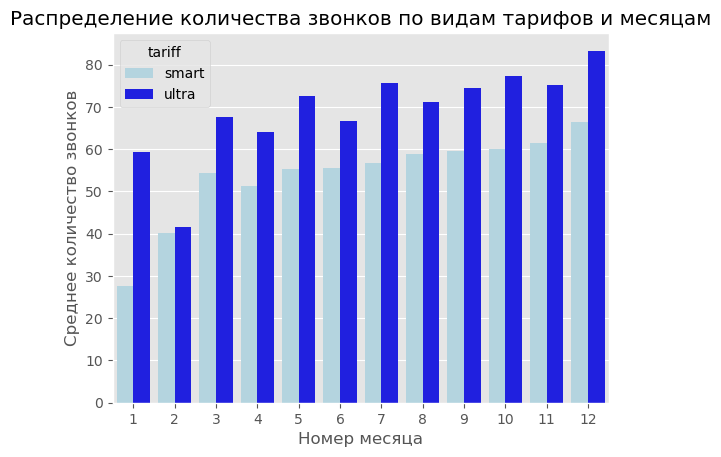

In [50]:
ax = sns.barplot(x='month',
            y='calls_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Распределение количества звонков по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество звонков');

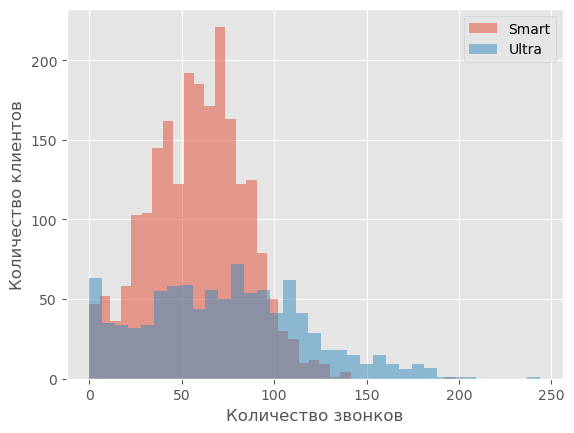

In [51]:
user_behavior.groupby('tariff')['calls'].plot(kind='hist', bins=35, alpha=0.5)
plt.legend(['Smart', 'Ultra'])
plt.xlabel('Количество звонков')
plt.ylabel('Количество клиентов')
plt.show()

Распределение средней продолжительности звонков по видам тарифов и месяцам

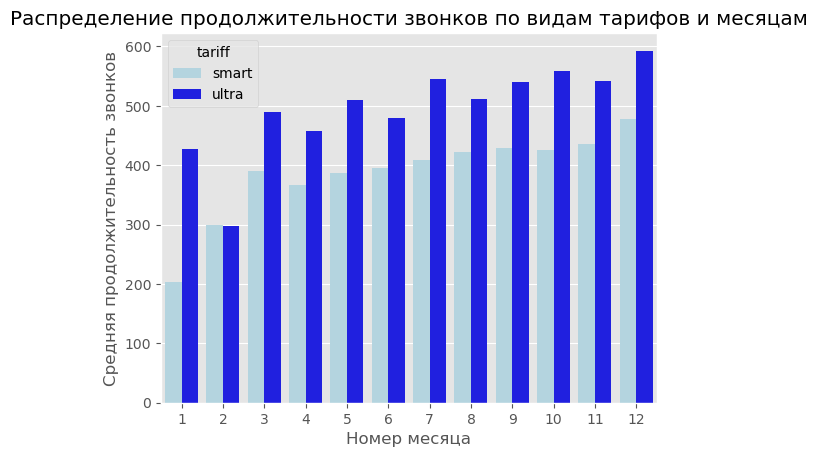

In [52]:
ax = sns.barplot(x='month',
            y='minutes_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Распределение продолжительности звонков по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Средняя продолжительность звонков');

<AxesSubplot:>

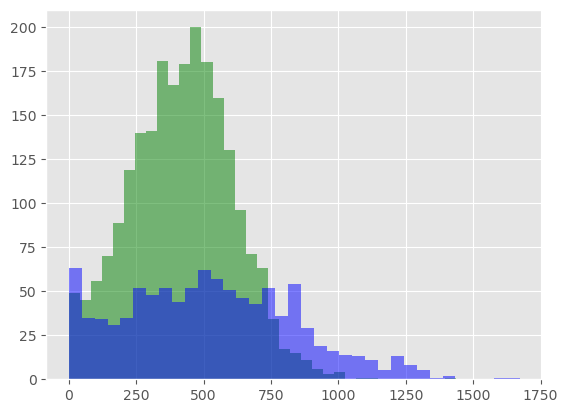

In [53]:
user_behavior[user_behavior['tariff'] =='smart']['minutes'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['minutes'].hist(bins=35, alpha=0.5, color='blue')

Средняя длительность разговоров у абонентов тарифа Ultra больше, чем у абонентов тарифа Smart. В течение года пользователи обоих тарифов увеличивают среднюю продолжительность своих разговоров. Рост средней длительности разговоров у абонентов тарифа Smart равномерный в течение года. Пользователи тарифа Ultra не проявляют подобной линейной стабильности. Стоит отметить, что феврале у абонентов обоих тарифных планов наблюдались самые низкие показатели.

Распределение среднего количества сообщений по видам тарифов и месяцам

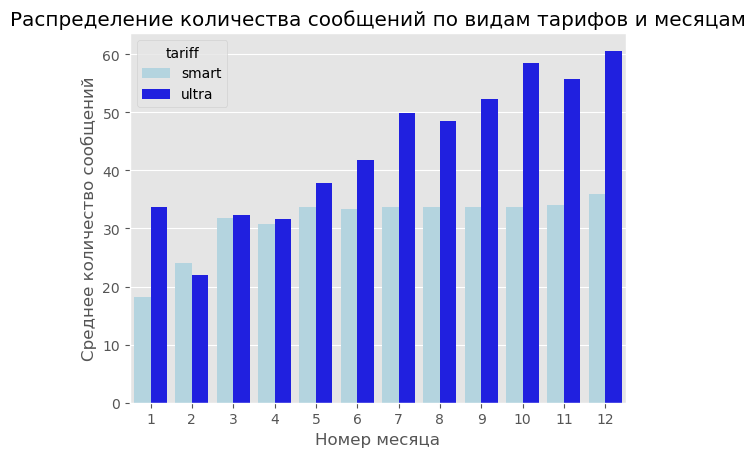

In [54]:
ax = sns.barplot(x='month',
            y='messages_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue']
)

ax.set_title('Распределение количества сообщений по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество сообщений');

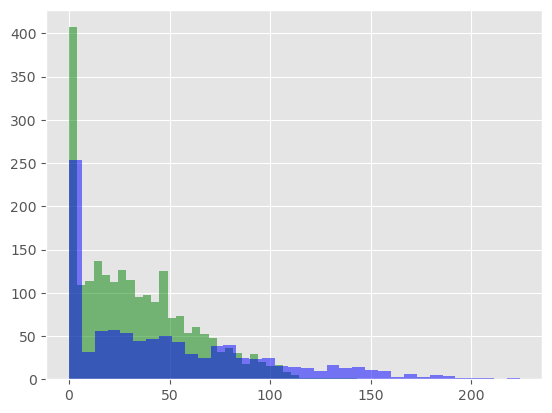

In [55]:
user_behavior[user_behavior['tariff'] =='smart']['messages'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['messages'].hist(bins=35, alpha=0.5, color='blue');

В среднем пользователи тарифа Ultra отправляют больше сообщений — почти на 20 сообщений больше, чем пользователи тарифа Smart. Количество сообщений в течение года на обоих тарифах растёт. Динамика по отправке сообщений схожа с тенденциями по длительности разговоров: в феврале отмечено наименьшее количество сообщений за год и пользователи тарифа Ultra также проявляют нелинейную положительную динамику.

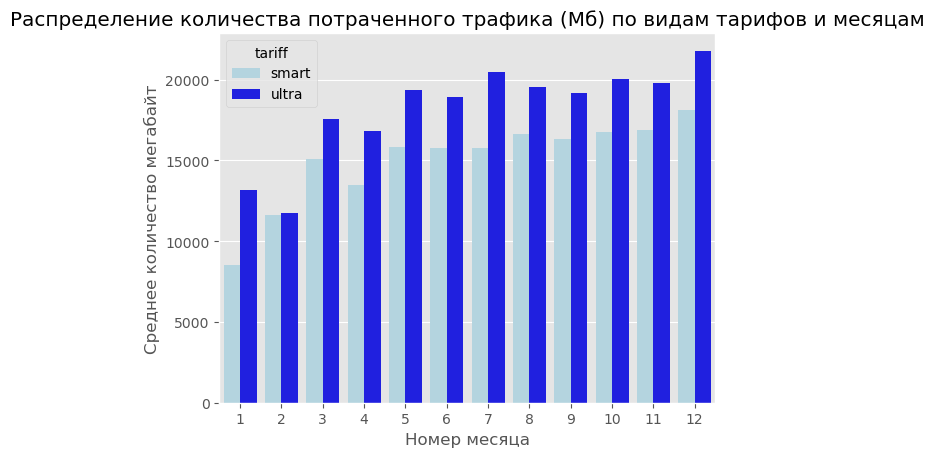

In [56]:
ax = sns.barplot(x='month',
            y='sessions_mean',
            hue='tariff',
            data=stats_df,
            palette=['lightblue', 'blue']
)

ax.set_title('Распределение количества потраченного трафика (Мб) по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество мегабайт');

Сравнение потраченных мегабайт среди пользователей тарифов Smart и Ultra

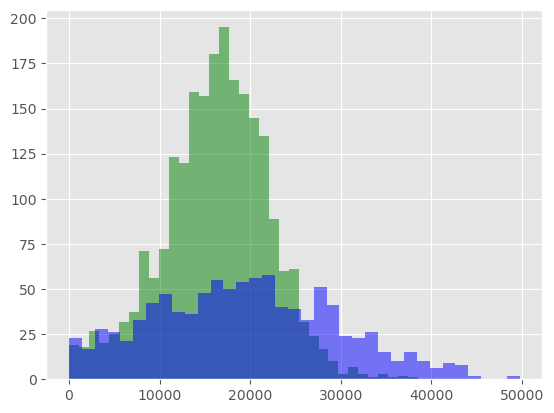

In [57]:
user_behavior[user_behavior['tariff'] =='smart']['mb_used'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['mb_used'].hist(bins=35, alpha=0.5, color='blue');

Меньше всего пользователи использовали интернет в январе, феврале и апреле. Чаще всего абоненты тарифа Smart тратят 15–17 Гб, а абоненты тарифного плана Ultra — 19–21 ГБ.

                                 Статистический анализ данных

Проверка гипотез

In [58]:
from scipy import stats as st

                                    1 гипотеза

Первая гипотеза которую нужно проверить - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

Сформулируем нулевую и альтернативную гипотезы:

H0 - Выручка (total_cost) пользователей "Ультра" = выручка (total_cost) пользователей "Смарт"


H1 - Выручка (total_cost) пользователей "Ультра" ≠ выручка (total_cost) пользователей "Смарт"


In [59]:
# results = вызов метода для проверки гипотезы

# alpha = задайте значение уровня значимости

# вывод значения p-value на экран 
# условный оператор с выводом строки с ответом
users_ultra = user_behavior.loc[user_behavior['tariff'] =='ultra']['total_cost']
users_smart = user_behavior.loc[user_behavior['tariff'] =='smart']['total_cost']

'Средняя выручка тарифа "smart": {:.1f}'.format(users_smart.mean())
'Средняя выручка тарифа "ultra": {:.1f}'.format(users_ultra.mean())
'Полная выручка тарифа "smart": {:.1f}'.format(users_smart.sum())
'Полная выручка тарифа "ultra": {:.1f}'.format(users_ultra.sum())
'Количество пользователей тарифа "smart": {}'.format(users_smart.count())
'Количество пользователей тарифа "ultra": {}'.format(users_ultra.count())
''
# вызов метода для проверки гипотезы
results = st.ttest_ind(users_ultra, users_smart, equal_var=False)

#значение уровня значимости
alpha = 0.05

# вывод значения p-value на экран 
print(results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

4.2606313931076085e-250
Отвергаем нулевую гипотезу


                                        2 гипотеза

Проверка гипотезы: средняя выручка с пользователей из Москвы отличается от выручки c пользователей других регионов;

H0 - Выручка (total_cost) пользователей из Москвы = выручка (total_cost) пользователей не из Москвы

H1 - Выручка (total_cost) пользователей из Москвы ≠ выручка (total_cost) пользователей не из Москвы

alpha = 0.05


In [60]:
# results = вызов метода для проверки гипотезы

# alpha = задайте значение уровня значимости

# вывод значения p-value на экран 
# условный оператор с выводом строки с ответом
from_moscow = user_behavior[user_behavior['city'] == 'Москва']['total_cost']
not_from_moscow = user_behavior[user_behavior['city'] != 'Москва']['total_cost']

# вызов метода для проверки гипотезы
results = st.ttest_ind(from_moscow, not_from_moscow, equal_var=False)

# значение уровня значимости
alpha = 0.05

# вывод значения p-value на экран 
print(results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


                                                  Вывод

Сделав предварительный анализ тарифов на небольшой выборке пользователей можем сделать следующие выводы:

- Средние чеки тарифов смарт и ультра значимо различаются. В среднем пользователи тарифа ультра платят больше

- Средняя выручка по Москве и другим регионам значимо не различаются и рекламную компанию можно устроить по всей территории распространения сети

- Поведение клиентов в течение года очень хорошо отображено на графиках. Эти графики будут полезны чтобы скорректировать во времени рекламные компании.